# Transversal Pump

In [1]:
using QuantumOptics
using PyPlot
using Printf
using LinearAlgebra

In [24]:
# Define Parameters
N_cutoff = 16
xmin = 0
xmax = 1
Nsteps = 32

k = 2*π
ωr = 1

Δc = -300 * ωr
η = 250 * ωr
U0 = -100 * ωr;

In [4]:
# Bases
b_position = PositionBasis(xmin, xmax, Nsteps)
b_fock = FockBasis(N_cutoff)

# Operators for atom
p = momentum(b_position)

# Operators for cavity
a = destroy(b_fock) ⊗ one(b_position)
ad = dagger(a);

In [36]:
# Hamiltonian and calculate states
potential = x -> U0*cos(k*x)^2
H_int = (one(b_fock) ⊗ potentialoperator(b_position, potential))*ad*a
H_kin = (one(b_fock) ⊗ p^2) / k^2
pump = x -> η*cos(k*x)
H_pump = (one(b_fock) ⊗ potentialoperator(b_position, pump)) * (a + ad)
H_cavity = -Δc*ad*a
H = H_kin + dense(H_int) + H_pump + H_cavity

E, states = eigenstates((H + dagger(H))/2, 1);

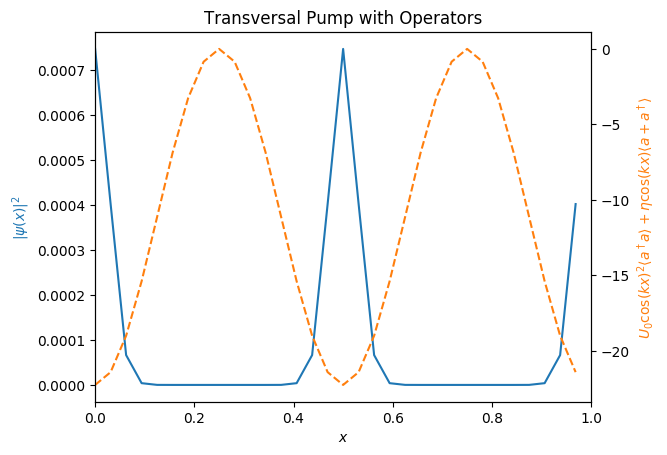

In [6]:
pos_dense = ptrace(states[1], 1)
density = diag(pos_dense.data)

ada_exp = expect(ad*a, states[1])
apad_exp = expect(a + ad, states[1])

xpoints = samplepoints(b_position)
pot = @. U0*cos(k*xpoints)^2*real(ada_exp) + η*cos(k*xpoints)*real(apad_exp)

fig = figure()
host = fig.add_subplot(111)
par1 = host.twinx()

host.set_xlim(xmin, xmax)
# host.set_ylim(-0.0006, 0.0121)
# par1.set_ylim(-158.378319, 127.354017)

title("Transversal Pump with Operators")
host.set_xlabel(L"x")
host.set_ylabel(L"|\psi(x)|^2")
par1.set_ylabel(L"U_0\cos(kx)^2\langle a^\dagger a\rangle + \eta \cos(kx) \langle a + a^\dagger \rangle")


host.plot(xpoints, abs2.(density ./ sqrt(Nsteps)), "C0")
par1.plot(xpoints, pot, "C1", linestyle="--")

host.yaxis.label.set_color("C0")
par1.yaxis.label.set_color("C1");

In [7]:
# Boundaries
println("host.set_ylim(" *@sprintf("%.4f", host.get_ylim()[1]) *", " *@sprintf("%.4f", host.get_ylim()[2]) *")")
println("par1.set_ylim(" *@sprintf("%.6f", par1.get_ylim()[1]) *", " *@sprintf("%.6f", par1.get_ylim()[2]) *")");

host.set_ylim(-0.0000, 0.0008)
par1.set_ylim(-23.357851, 1.112279)


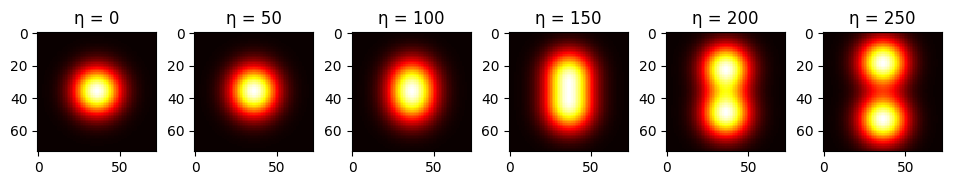

In [57]:
# Qfunc
η = [0:50:250;] .* ωr

boundary = 3.6
xvec = [-boundary:.1:boundary;]
yvec = [-boundary:.1:boundary;]

fig = figure()

for i in 1:6
    pump = x -> η[i]*cos(k*x)
    H_pump = (one(b_fock) ⊗ potentialoperator(b_position, pump)) * (a + ad)
    H = H_kin + dense(H_int) + H_pump + H_cavity
    E, states = eigenstates((H + dagger(H))/2, 1);

    plt_index = 660 + i
    subplot(plt_index)
    grid = qfunc(ptrace(states[1], 2), xvec, yvec)
    imshow(abs.(grid), cmap="hot", interpolation="nearest");
    title("η = $(η[i])")
end

tight_layout(rect=[0, 0, 1.5, 2]);

In [66]:
# Photon number, max(qfunc) as function of η
for i in 1:6
    pump = x -> η[i]*cos(k*x)
    H_pump = (one(b_fock) ⊗ potentialoperator(b_position, pump)) * (a + ad)
    H = H_kin + dense(H_int) + H_pump + H_cavity
    E, states = eigenstates((H + dagger(H))/2, 1);
    
    ada_exp = expect(ad*a, states[1])
    println("N(η=$(η[i]) = $(real(ada_exp))")
end

println("")

for i in 1:6
    pump = x -> η[i]*cos(k*x)
    H_pump = (one(b_fock) ⊗ potentialoperator(b_position, pump)) * (a + ad)
    H = H_kin + dense(H_int) + H_pump + H_cavity
    E, states = eigenstates((H + dagger(H))/2, 1);
    
    grid = qfunc(ptrace(states[1], 2), xvec, yvec)
    println("max(qfunc(η=$(η[i]))) = $(maximum(abs.(grid)))")
end

N(η=0 = 8.754759073617965e-30
N(η=50 = 0.04916376253965152
N(η=100 = 0.22245572243238854
N(η=150 = 0.5203909350949986
N(η=200 = 0.9433438606998646
N(η=250 = 1.4913866437641874

max(qfunc(η=0)) = 0.31830988618379075
max(qfunc(η=50)) = 0.3030678383936976
max(qfunc(η=100)) = 0.2549430204712286
max(qfunc(η=150)) = 0.18955540216866906
max(qfunc(η=200)) = 0.1630912370458191
max(qfunc(η=250)) = 0.1594225234593619
